# Trabajo Práctico Semanal 4
Teoria de circuitos II

### Sandomir L Uriel

<img src="https://i.gyazo.com/f9a9d3a26b9b99f16e7db57178405fa5.png"/>

Proponemos un Filtro Pasa-Todo, cumpliendo la funcion transferencia normalizada en frecuencia $T_{(s)} = \frac{s-1}{s+1}$

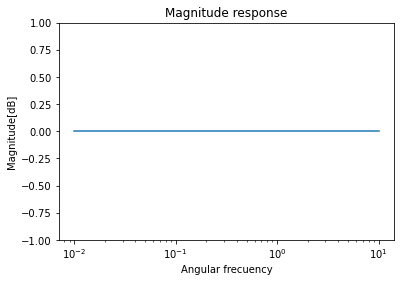

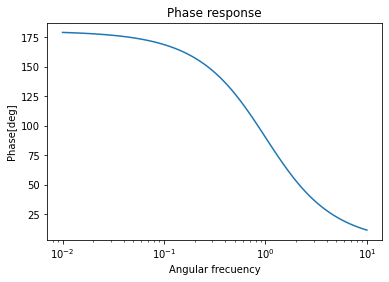

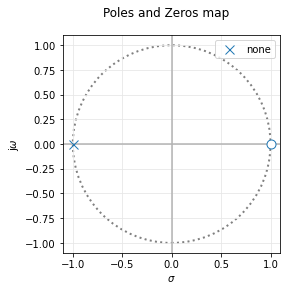

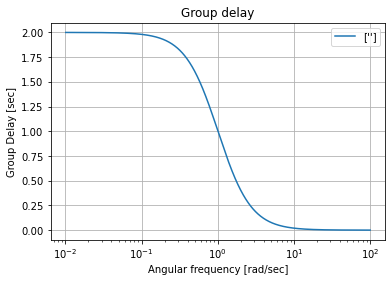

In [38]:
import splane as sp
from scipy import signal
import matplotlib.pyplot as plt

my_tf = signal.TransferFunction([1,-1], [1, 1])
w, mag, phase = signal.bode(my_tf)

plt.figure()
plt.ylim(-1,1)
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)    # Magnitude

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Phase
sp.pzmap(my_tf)            # P&Z Map
sp.GroupDelay(my_tf)         # GroupDelay
plt.show()

#### Retardo de grupo

$\tau_{(\omega)} = -\frac{∂φ}{∂\omega} = \frac{2}{1 + \omega^2}$ con $φ = \pi - 2.arcotan(\frac{\omega}{\omega_0})$

#### Implementacion pasiva:

Para implementar un Filtro Pasa-Todo pasivo, utilizamos una estructura llamada Lattice:

<img src="https://i.gyazo.com/3a3ffe209416acff7d5c80167628d009.png"/>
<br>

Donde $φ_{(0)} = 180º$ , $ φ_{(1)} = 180º - 15º = 165º$ 

Por lo tanto:
<br>
$165º = \pi - 2.arcotan(\frac{1}{\omega_0}) \rightarrow \frac{1}{\omega_0} = tan(7.5º) = 0.3695$
<br>

Para implementar:
$\omega_0 = \frac{1}{R_3C} = 2.706$
<br>
$R_1 = R_2 = R_3 = 1$
<br>
$C = .3695$
<br><br>
Obteniendo:

<img src="https://i.gyazo.com/53efd7e6ada90d5bd2baf85992cd2b5c.png"/>

#### Implementacion activa

Para ello, utilizaremos el modelo activo de la estructura Lattice: 

<img src="https://i.gyazo.com/9ba405c1f3fb6c6da9d21338296b621c.png"/>
<br>
<img src="https://i.gyazo.com/4d76ad2b0f783a289bf638b065611618.png"/>

Vemos que ambos casos, se cumple que para $\omega = 1$, tenemos un desfasaje de $15º$ con respecto a la señal de entrada, por lo que consideramos cumplida a la consigna.

<br><br><br><br>

<img src="https://i.gyazo.com/10f6b2923923958b9508f8ff8772c959.png"/>

Teniendo en cuenta la funcion transferencia bicuadratica pasiva generica, buscaremos los valores de los coeficientes para conseguir las transferencias deseadas en cada caso:
$T_{(s)} = b . \frac{s^2 + s \frac{1}{RC}\frac{a}{b} + \frac{1}{LC}\frac{d}{b}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}} $

### Caso A

En este caso, buscamos implementar un filtro Notch Pasa-Bajos, por lo que buscamos una funcion transferencia de la forma:
<br>
$T_{(s)} = \frac{s^2 + \omega_z^2}{s^2 + s \frac{\omega_p}{Q_p} + \omega_p^2}$
<br>
Donde tenemos:
<br>
$\omega_z = 2$
<br>
$\omega_p = 1$
<br>
$Q_z \rightarrow \infty$
<br>
$Q_p = \frac{1}{\sqrt{2}}$
<br>
En $\omega = 0$ queremos 0dB pero tenemos una ganancia de 4 veces, por lo tanto $b = \frac{1}{4}$.
Ademas:
<br>
$a = 0$
<br>
$d = 1$
<br><br>
Tenemos entonces un circuito pasivo configurado de la siguiente manera:

<img src="https://i.gyazo.com/2cdf6142101964a9af2fdd87a30f393d.png"/>
<br>
<img src="https://i.gyazo.com/ad010c41d8ee2e31306911b3d75d9e0c.png"/>

(array([-0.+2.j,  0.-2.j]),
 array([-0.70710678+0.70710678j, -0.70710678-0.70710678j]))

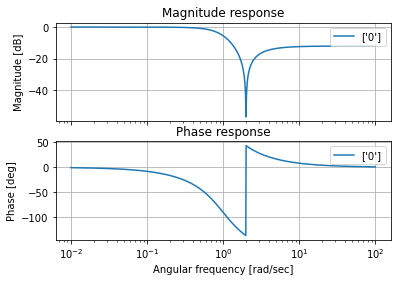

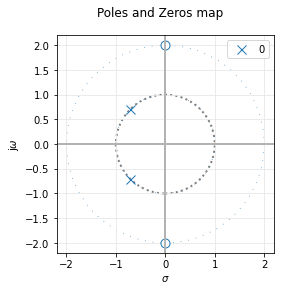

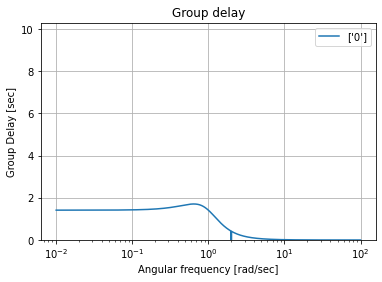

In [50]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp

b = 1/4
d = 1

num_a = [b*1, b*0, b*2**2/d]
den_a = [1, m.sqrt(2), 1]

casoa = sp.TransferFunction(num_a, den_a)

sp.analyze_sys(casoa)

#Coordenadas de polos y ceros
zerosa = np.roots(num_a)
polesa = np.roots(den_a)
zerosa, polesa

### Caso B

En este caso, buscamos implementar un filtro Elimina-Banda, por lo que buscamos una funcion transferencia de la forma:
<br>
$T_{(s)} = \frac{s^2 + s \frac{\omega_z}{Q_z} + \omega_z^2}{s^2 + s \frac{\omega_p}{Q_p} + \omega_p^2}$
<br>
Donde tenemos:
<br>
$\omega_z = 1$
<br>
$\omega_p = 1$
<br>
$Q_z = \frac{1}{\sqrt{2}}$
<br>
$Q_p = \frac{1}{\sqrt{2}}$
<br>
En $\omega = 0$ tenemos 0dB, por lo tanto $b = 1$.
<br>
Como buscamos una atenuacion de 6dB en $\omega = \omega_0$, necesitamos que la relacion $\frac{Q_p}{Q_z} = \frac{1}{2}$, lo cual conseguimos con $a = \frac{1}{2}$
<br>
Como $\omega_z = \omega_p \rightarrow d = b = 1$
<br><br>
Tenemos entonces un circuito pasivo configurado de la siguiente manera:
<br>
<img src="https://i.gyazo.com/0fd2eafedf60845097672f5410bc2962.png"/>
<br>
<img src="https://i.gyazo.com/02c24ce693ec6f6010549a7a2ab054f3.png"/>

(array([-0.35355339+0.93541435j, -0.35355339-0.93541435j]),
 array([-0.70710678+0.70710678j, -0.70710678-0.70710678j]))

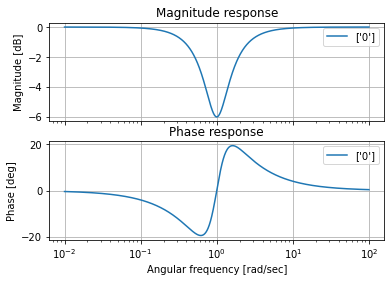

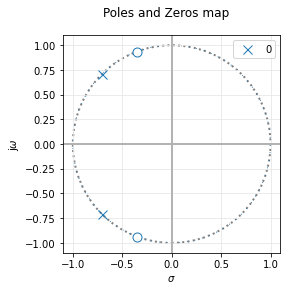

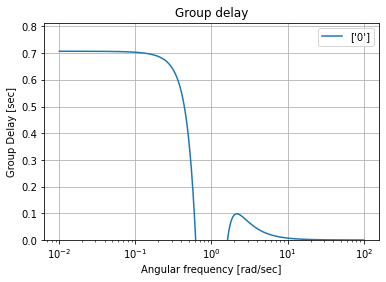

In [49]:
a = 1/2 
b = 1
d = 1

num_b = [1, a*m.sqrt(2), 1]
den_b = [1, m.sqrt(2), 1]

casob = sp.TransferFunction(num_b, den_b)

sp.analyze_sys(casob)

#Coordenadas de polos y ceros
zerosb = np.roots(num_b)
polesb = np.roots(den_b)
zerosb, polesb

### Caso D

En este caso, buscamos implementar un filtro Notch Pasa-Bajos, ya que su respuesta de fase responde a la requerida, donde el aporte de los polos siempre es mayor o igual que el de los ceros, con un leve realce posterior a la frecuencia eliminada:
<br>
$T_{(s)} = \frac{s^2 + \omega_z^2}{s^2 + s \frac{\omega_p}{Q_p} + \omega_p^2}$
<br>
Donde tenemos:
<br>
$\omega_z = 4$
<br>
$\omega_p = 1$
<br>
$Q_z \rightarrow \infty$
<br>
$Q_p = \frac{1}{\sqrt{2}}$
<br>
En $\omega = 0$ queremos 0dB pero tenemos una ganancia de 16 veces, por lo tanto $b = \frac{1}{16}$.
<br>
Ademas:
<br>
$a = 0$
<br>
$d = 1$
<br>

Tenemos entonces un circuito pasivo configurado de la siguiente manera:

<img src="https://i.gyazo.com/248cf61e9f433c9c27268405d7ee22c4.png"/>
<br>
<img src="https://i.gyazo.com/4dfa91a9c31acbdb54d04c35119fa22f.png"/>

(array([-0.+4.j,  0.-4.j]),
 array([-0.70710678+0.70710678j, -0.70710678-0.70710678j]))

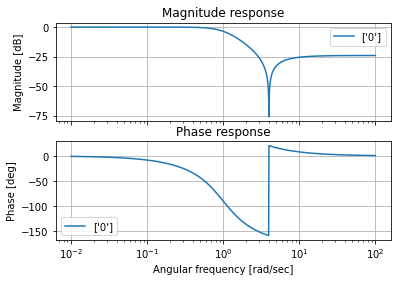

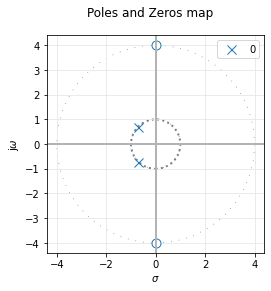

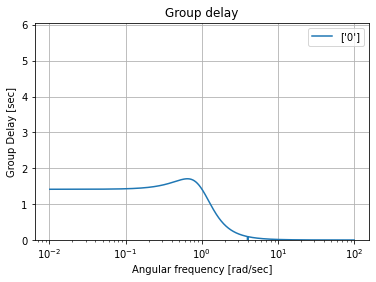

In [59]:
b = 1/16
d = 1 

num_c = [b*1, b*0, b*4**2/d]
den_c = [1, m.sqrt(2), 1]

casoc = sp.TransferFunction(num_c, den_c)

sp.analyze_sys(casoc)

#Coordenadas de polos y ceros
zerosc = np.roots(num_c)
polesc = np.roots(den_c)
zerosc, polesc

<br><br><br><img src="https://i.gyazo.com/56e3cbd4340260f52503ba38ba48d735.png"/>

Podemos observar que para $\omega = 0$, el aporte de los ceros es de $\frac{\pi}{2}$ y el de los polos nulo, es decir que tenemos un cero en el origen.
<br>
De los polos podemos observar que para para parte imaginaria tenemos $6\omega$ y en la parte real $-\omega^2 + 4$
<br><br>
Por lo que podemos decir que tenemos una funcion transferencia de la forma:
<br>
$F_{(jw)} = \frac{jw.K}{(jw)^2 + jw.6 + 4}$
<br><br>
Esta funcion, coincide con la de un Filtro Pasa-Banda de segundo orden, donde $K = \frac{\omega_0}{Q}$
<br><br>
Ademas, podemos identificar $\omega_0 = 2$ y $Q = \frac{1}{3}$
<br><br>
Finalmente, conseguimos una funcion transferencia de la forma:
<br>
$F_{(s)} = \frac{s\frac{\omega_0}{Q}}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}$
<br><br><br><br>
#### Diagrama de polos y ceros

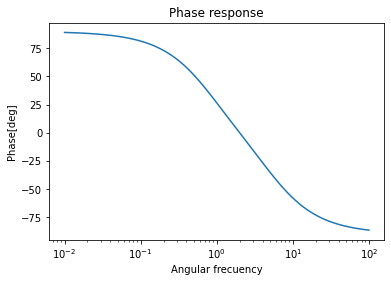

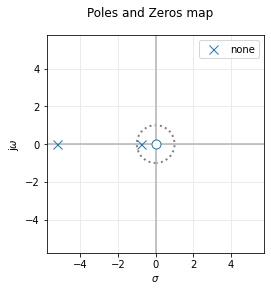

In [64]:
wo = 2
q = 1/3

num3 = [wo/q, 0]
den3 = [1, wo/q, wo**2]

filter3 = sp.TransferFunction(num3, den3)

w, mag, phase = signal.bode(filter3)

plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Phase
sp.pzmap(filter3)            # P&Z Map
plt.show()

Con estos graficos, podemos corroborar que para $\omega = 0$ el aporte de los polos es nulo mientras que el del cero ubicado en el origen es de $\frac{\pi}{2}\frac{rad}{seg}$.
<br><br>
En $\omega \rightarrow \infty$ el aporte del cero sigue siendo de $\frac{\pi}{2}\frac{rad}{seg}$, pero como cada polo aporta $\frac{\pi}{2}\frac{rad}{seg}$, terminamos consiguiendo una fase de $-90º$
<br><br>
Finalmente, cuando $\omega = \omega_0 = 2$, el argumento de la arcotangente de nuestra funcion de fase nos queda $\frac{4.2}{-4+4}$, lo cual hace tender a la arcotangente a $\frac{\pi}{2}$ implicando que en nuestra frecuencia de corte, ambos polos tendran un aporte igual que el del cero, por lo que la fase total sera de $0º$

#### Implementacion pasiva

$\omega_0^2 = \frac{1}{LC} = 4$
<br>
$Q = \frac{1}{3}$
<br>
Adoptamos: $R = \frac{1}{3}$, $C = L = 0.5$

<img src="https://i.gyazo.com/c5e1de7ac3a8a2eb97702dd4cf5fe315.png"/>
<img src="https://i.gyazo.com/2d765634244cd5b30ef0ba534caa9aff.png"/>